In [26]:
import math
import numpy as np
from random import randint
import matplotlib.pyplot as plt

In [27]:
# low = lower range for variables, high = higher range for variables
def genesis(size,var, high , low):
   pop_size = (size,var)
   new_pop = np.random.uniform(low=low,high=high,size=pop_size)
   return new_pop

In [28]:
def fitness(p):
# Evaluating fitness Interference function "double fit (doublep[])".
   fitness=np.zeros((len(p),1))
   for i in range(len(p)):
       x,y,z = p[i][0] , p[i][1] , p[i][2]
        # Define your fitness function here
       fitness[i,0] = 2 * x * z * math.exp(-x) - 2 * y**3 + y**2 - 3 * z**3
   return fitness

In [29]:
def selection(pop, fitness, num_parents):
   parents = np.empty((num_parents, pop.shape[1]))
   for parent_num in range(num_parents):
      max_fitness_idx = np.where(fitness == np.max(fitness))
      max_fitness_idx = max_fitness_idx[0][0]
      parents[parent_num, :] = pop[max_fitness_idx, :]
      fitness[max_fitness_idx] = -99999999999
   return parents

In [30]:
def crossover(parents, offspring_size):
   offspring = np.empty(offspring_size)
   crossover_point = np.uint8(offspring_size[1]/2)
   for k in range(offspring_size[0]):
      parent1_idx = k%parents.shape[0]
      parent2_idx = (k+1)%parents.shape[0]
      offspring[k, 0:crossover_point] = parents[parent1_idx,     0:crossover_point]
      offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
   return offspring

In [31]:
def mutation(offspring_crossover):
   for idx in range(offspring_crossover.shape[0]):
      random_value = np.random.uniform(-10, 10, 1)
# 10 percent change maximum keeping 90 percent mutation rate 
      i= randint(0, 2)
      offspring_crossover[idx, i] = offspring_crossover[idx, i] + random_value 
   return offspring_crossover

In [32]:


num_var = 3
sizeof_pop= 100
upper_limit = 100
lower_limit = -100
num_parents = 2

population = genesis(sizeof_pop , num_var, upper_limit ,lower_limit)
print(population)
Scores=[]
num_generations = 20
for generation in range(num_generations):
   print("\n\nGeneration : ", generation)
   fitness_score = fitness(population)
   parents = selection(population, fitness_score, num_parents)
   print("Best Parents \n",parents)
   offspring_crossover = crossover(parents, offspring_size=(2*num_parents, num_var))
   offspring_mutation = mutation(offspring_crossover)
   print("Mutated OffSprings\n",offspring_mutation)
   population[0:parents.shape[0], :] = parents
   population[parents.shape[0]:6, :] = offspring_mutation
   Scores.append(np.max(fitness_score))
   print("Best result : ", np.max(fitness_score))

[[-29.69434563  21.9300109   -1.77798783]
 [-56.30414655  27.76712321 -79.66681414]
 [-38.97156285  82.57136131  59.36116916]
 [-10.59291643 -60.8685682   15.35612497]
 [ 78.54810891 -29.79558193  43.38347941]
 [ 69.18354125 -30.7090325   96.07528528]
 [-30.69901523  73.61384454   7.66611291]
 [-94.78817687 -86.86267506  44.27158716]
 [ 96.56266191  33.79109504 -76.79787665]
 [ 75.94819003  71.49130667 -45.13449418]
 [  1.12337222 -23.24951801 -22.83625613]
 [ 23.97486789 -13.8598544  -44.09063107]
 [ 70.79335055 -98.18826066 -19.4848187 ]
 [ 48.0044282  -66.28374935  -1.69281652]
 [ 97.43851566 -99.4992119  -11.35174249]
 [ 65.97431697  57.86735825  26.27973804]
 [ 81.13401484 -17.76604733  46.78662444]
 [-88.02104038 -31.63074323  80.4800085 ]
 [-94.05895827 -70.84629077  59.88796892]
 [-79.13491546 -96.20838165 -42.97302802]
 [ 68.91856143 -89.52971035 -12.85048473]
 [ 30.46384522  35.97381618 -97.71996547]
 [ 55.97422834 -46.34667952  30.45123229]
 [-59.36529055  63.11037576  -7.58

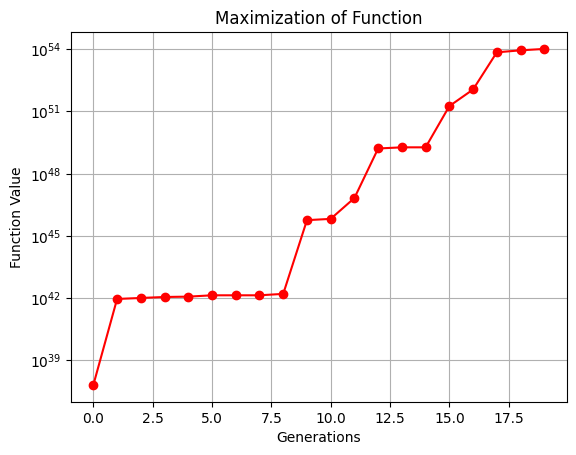

In [33]:

Evaluations = Scores
plt.plot(Evaluations,'o-',color='red')
plt.yscale('log')
plt.xlabel('Generations')
plt.ylabel('Function Value')
plt.title("Maximization of Function")
plt.grid(True)
plt.show()